In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dropout,Dense,Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model

In [2]:
df=pd.read_csv('spam_or_not_spam.csv',delimiter=",")

C:\Users\Faraz\AppData\Local\Temp\ipykernel_4448\84023318.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('spam_or_not_spam.csv',delimiter=",")


In [3]:
df

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,Not Spam
1,martin a posted tassos papadopoulos the greek ...,Not Spam
2,man threatens explosion in moscow thursday aug...,Not Spam
3,klez the virus that won t die already the most...,Not Spam
4,in adding cream to spaghetti carbonara which ...,Not Spam
...,...,...
1048570,NaN,NaN
1048571,NaN,NaN
1048572,NaN,NaN
1048573,NaN,NaN


In [4]:
df=df.dropna()

<Axes: xlabel='label', ylabel='count'>

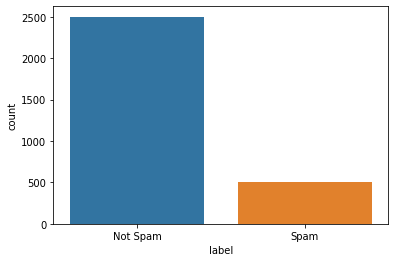

In [5]:
sns.countplot(x='label',data=df)

In [8]:
token=Tokenizer(num_words=1000)
token.fit_on_texts(df['email'])
seq=token.texts_to_sequences(df['email'])
pad=pad_sequences(seq)
pad

array([[  0,   0,   0, ..., 592,   8,   8],
       [  0,   0,   0, ..., 147,   3,   8],
       [  0,   0,   0, ..., 147,   3,   8],
       ...,
       [  0,   0,   0, ...,   2, 147, 140],
       [  0,   0,   0, ...,  20,  11, 783],
       [  0,   0,   0, ..., 343, 249,  75]])

In [14]:
df['label'].replace(['Not Spam'],1)
df['label'].replace(['Spam'],0)

0       1
1       1
2       1
3       1
4       1
       ..
3011    0
3012    0
3013    0
3014    0
3015    0
Name: label, Length: 2999, dtype: int64

In [16]:
y=df['label'].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [57]:
y=df['label'].values
from tensorflow.keras.utils import to_categorical

# Assuming y contains binary labels where 0 represents "spam" and 1 represents "not spam"
y_binary = to_categorical(y, num_classes=2)
y_binary

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [49]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="sigmoid"))

In [58]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(pad, y_binary, epochs=10)

Epoch 1/10
94/94 [==============================] - 5s 12ms/step - loss: 8.6660 - accuracy: 0.7809
Epoch 2/10
94/94 [==============================] - 1s 8ms/step - loss: 1.7422 - accuracy: 0.8603
Epoch 3/10
94/94 [==============================] - 1s 8ms/step - loss: 0.6853 - accuracy: 0.9036
Epoch 4/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2811 - accuracy: 0.9470
Epoch 5/10
94/94 [==============================] - 1s 7ms/step - loss: 0.1254 - accuracy: 0.9657
Epoch 6/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0867 - accuracy: 0.9750
Epoch 7/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0335 - accuracy: 0.9867
Epoch 8/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0224 - accuracy: 0.9920
Epoch 9/10
94/94 [==============================] - 1s 9ms/step - loss: 0.0121 - accuracy: 0.9950
Epoch 10/10
94/94 [==============================] - 1s 7ms/step - loss: 0.0070 - accuracy: 0.9977


In [90]:
have='apols if this has been posted before URL rob yahoo groups sponsor NUMBER dvds free s p join now URL to unsubscribe from this group send an email to forteana unsubscribe URL your use of yahoo groups is subject to URL'

In [132]:
tr=token.texts_to_sequences(have)
train=pad_sequences(tr,maxlen=3006)
train

array([[  0,   0,   0, ...,   0,   0,   5],
       [  0,   0,   0, ...,   0,   0, 226],
       [  0,   0,   0, ...,   0,   0, 184],
       ...,
       [  0,   0,   0, ...,   0,   0, 172],
       [  0,   0,   0, ...,   0,   0, 143],
       [  0,   0,   0, ...,   0,   0, 168]])

In [102]:
model.predict(train)

7/7 [==============================] - 0s 0s/step


array([[0.5057997 , 0.4934677 ],
       [0.59863985, 0.37292466],
       [0.58180374, 0.3947248 ],
       [0.5753375 , 0.40314618],
       [0.5131111 , 0.485051  ],
       [0.50435734, 0.49836966],
       [0.5076333 , 0.491611  ],
       [0.6222842 , 0.34267485],
       [0.50435734, 0.49836966],
       [0.5162376 , 0.48093995],
       [0.659269  , 0.2964372 ],
       [0.5076333 , 0.491611  ],
       [0.5131111 , 0.485051  ],
       [0.50435734, 0.49836966],
       [0.659269  , 0.2964372 ],
       [0.5057997 , 0.4934677 ],
       [0.5131111 , 0.485051  ],
       [0.50435734, 0.49836966],
       [0.6018215 , 0.36882764],
       [0.5356591 , 0.45525822],
       [0.5356591 , 0.45525822],
       [0.6022186 , 0.3683166 ],
       [0.50435734, 0.49836966],
       [0.59863985, 0.37292466],
       [0.58180374, 0.3947248 ],
       [0.5131111 , 0.485051  ],
       [0.5162376 , 0.48093995],
       [0.5356591 , 0.45525822],
       [0.54430526, 0.44385162],
       [0.50435734, 0.49836966],
       [0.

In [103]:
embedding_dim = 100  # Adjust the embedding dimension as needed
vocab_size = len(token.word_index) + 1  # Add 1 for the reserved index 0
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=3006))
model2.add(tf.keras.layers.Flatten())  # Flatten the 3D embedding tensor to be 2D
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dense(2, activation='sigmoid'))

In [105]:
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [106]:
model2.fit(pad, y_binary, epochs=10)

Epoch 1/10
94/94 [==============================] - 55s 563ms/step - loss: 0.4887 - accuracy: 0.8780
Epoch 2/10
94/94 [==============================] - 54s 580ms/step - loss: 0.0480 - accuracy: 0.9860
Epoch 3/10
94/94 [==============================] - 58s 620ms/step - loss: 0.0139 - accuracy: 0.9950
Epoch 4/10
94/94 [==============================] - 66s 704ms/step - loss: 0.0070 - accuracy: 0.9977
Epoch 5/10
94/94 [==============================] - 66s 707ms/step - loss: 0.0046 - accuracy: 0.9987
Epoch 6/10
94/94 [==============================] - 62s 660ms/step - loss: 0.0037 - accuracy: 0.9987
Epoch 7/10
94/94 [==============================] - 60s 643ms/step - loss: 0.0026 - accuracy: 0.9990
Epoch 8/10
94/94 [==============================] - 55s 587ms/step - loss: 0.0023 - accuracy: 0.9993
Epoch 9/10
94/94 [==============================] - 65s 690ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 10/10
94/94 [==============================] - 65s 690ms/step - loss: 0.0017 - accura

In [113]:
a=model2.predict(train)
a.reshape(1,-1)

7/7 [==============================] - 0s 55ms/step


array([[0.549537  , 0.4720466 , 0.52053076, 0.5037411 , 0.44735622,
        0.5786696 , 0.5688411 , 0.45398518, 0.5050683 , 0.51987195,
        0.58365   , 0.4372407 , 0.44764453, 0.5782542 , 0.6579205 ,
        0.35797444, 0.58365   , 0.4372407 , 0.34661683, 0.6813047 ,
        0.38703173, 0.6411092 , 0.44764453, 0.5782542 , 0.5050683 ,
        0.51987195, 0.58365   , 0.4372407 , 0.38703173, 0.6411092 ,
        0.549537  , 0.4720466 , 0.5050683 , 0.51987195, 0.58365   ,
        0.4372407 , 0.4936868 , 0.5331401 , 0.4344863 , 0.5927228 ,
        0.4344863 , 0.5927228 , 0.5210851 , 0.503651  , 0.58365   ,
        0.4372407 , 0.52053076, 0.5037411 , 0.44735622, 0.5786696 ,
        0.5050683 , 0.51987195, 0.34661683, 0.6813047 , 0.4344863 ,
        0.5927228 , 0.22608724, 0.7991312 , 0.58365   , 0.4372407 ,
        0.4936867 , 0.5331401 , 0.4344863 , 0.5927227 , 0.6579205 ,
        0.35797444, 0.44735622, 0.5786696 , 0.46158746, 0.563865  ,
        0.4344863 , 0.5927228 , 0.58365   , 0.43

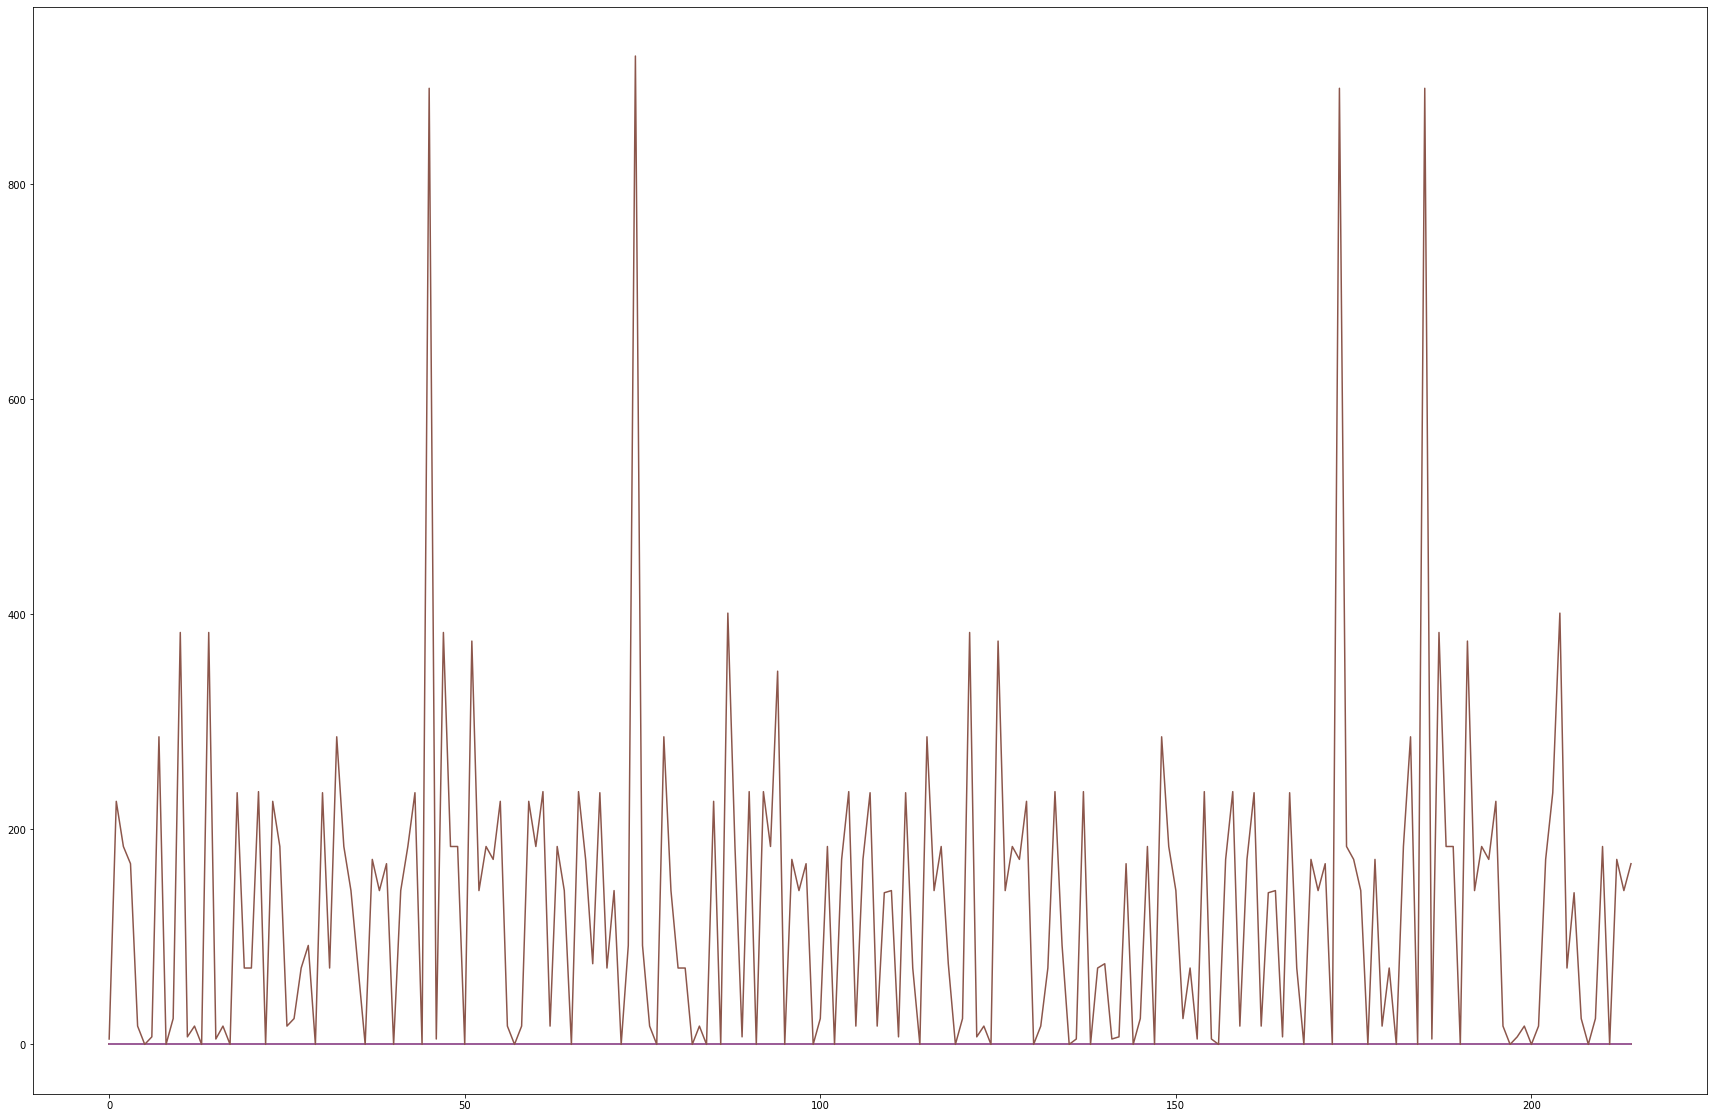

In [126]:
plt.figure(figsize=(30,20))
plt.plot(train)
plt.show()

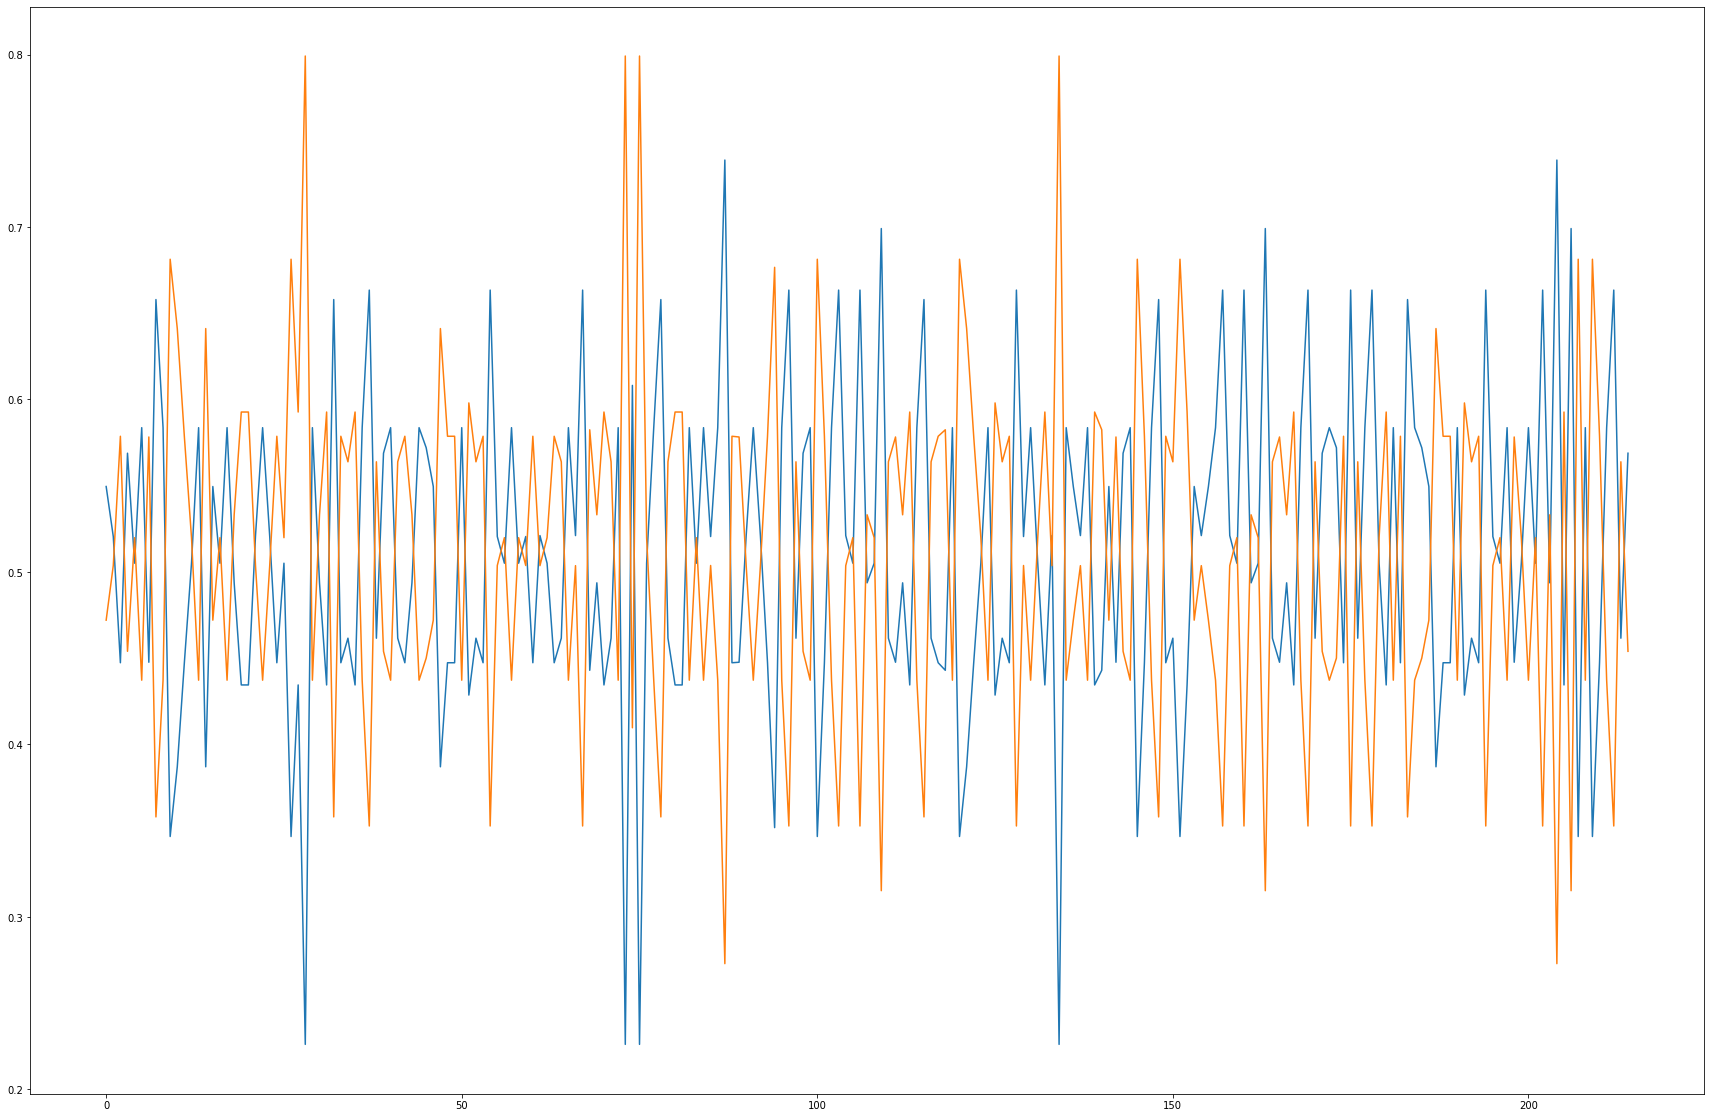

In [125]:
plt.figure(figsize=(30,20))
plt.plot(a)
plt.show()

<Axes: >

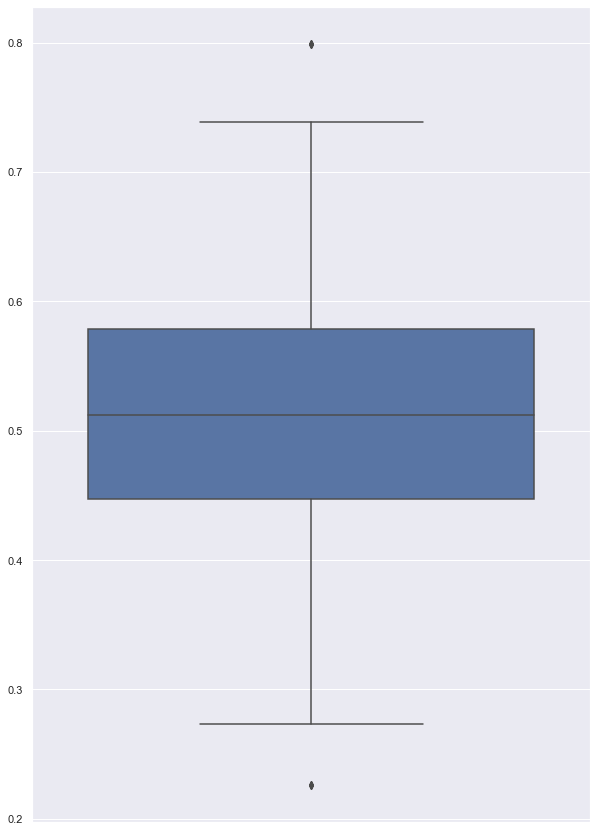

In [131]:
sns.set(rc={'figure.figsize':(10,15)})
sns.boxplot(y=a)